In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

In [63]:
rowdata = pd.read_csv('./diabetes.csv')
rowdata.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [64]:
rowdata.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [65]:
rowdata['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [59]:
num_cols = [col for col in rowdata.columns if rowdata[col].dtypes !='object']

In [66]:
#將那些影響數據的數值(不可能為0但資料顯示為0的)把他們變成空白
rowdata.loc[rowdata['Glucose'] == 0, 'Glucose'] = np.nan
rowdata.loc[rowdata['BloodPressure'] == 0, 'BloodPressure'] = np.nan
rowdata.loc[rowdata['SkinThickness'] == 0, 'SkinThickness'] = np.nan
rowdata.loc[rowdata['Insulin'] == 0, 'Insulin'] = np.nan
rowdata.loc[rowdata['BMI'] == 0.0, 'BMI'] = np.nan

C:\Users\USER\AppData\Local\Temp\ipykernel_9800\3143265240.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\USER\AppData\Local\Temp\ipykernel_9800\3143265240.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\USER\AppData\Local\Temp\ipykernel_9800\3143265240.py:6: UserWarning:



`distplot` is a dep

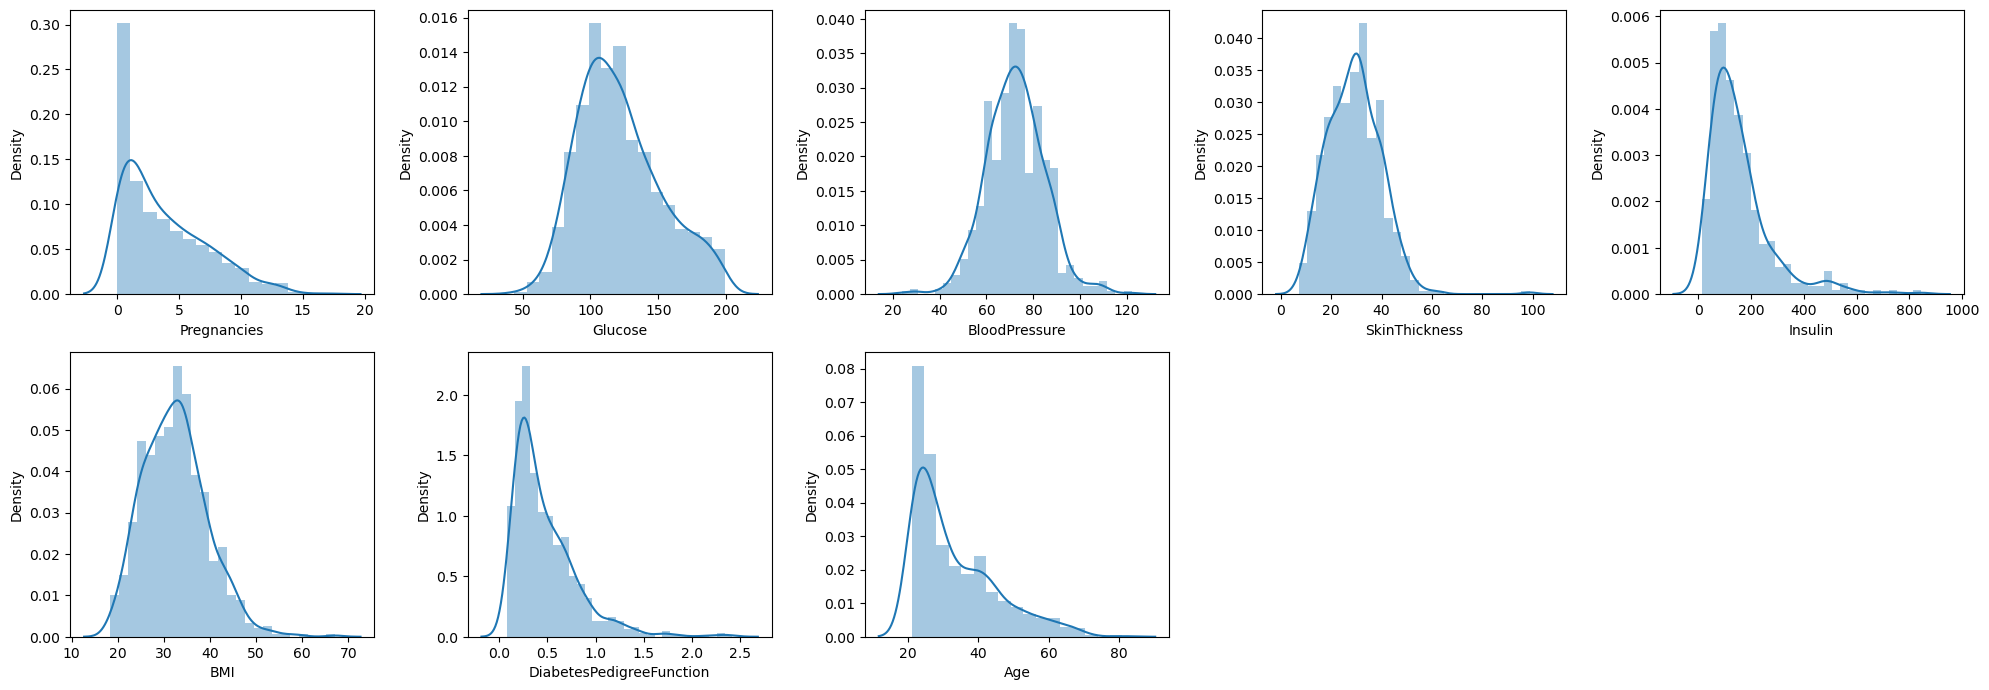

In [67]:
plt.figure(figsize =(20,10))
plot_number = 1
for column in num_cols:
    if plot_number <= 8:
        ax = plt.subplot(3, 5, plot_number)
        sns.distplot(rowdata[column])
        plt.xlabel(column)

    plot_number += 1
plt.tight_layout()
plt.show()

In [68]:
#繪製小提琴圖形，以發生可能為x軸,y軸為想了解與糖尿病發生相關的數據
def violin(col):
    fig = px.violin(rowdata, y=col, x="Outcome", color="Outcome", box=True, template = 'plotly_dark')
    return fig.show()
#繪製兩條曲線圖，以x軸為想了解與糖尿病發生相關的數據,y軸為發生密度，兩條曲線一條為發生的曲線，另一條為不發生的曲線
def kde(col):
    grid = sns.FacetGrid(rowdata, hue="Outcome", height = 6, aspect=2)
    grid.map(sns.kdeplot,col)
    grid.add_legend()
#繪製點分布圖，利用點的分布去了解糖尿病發與其他數據之相關
def scatter(col1, col2):
    fig = px.scatter(rowdata, x=col1, y=col2, color="Outcome", template = 'plotly_dark')
    return fig.show()

比較所有數據與糖尿病發生關係

In [69]:
#由圖形可以得知，體內的葡萄糖含量、年紀、BMI是最有可能去引發糖尿病發的狀況。
violin('Pregnancies')
violin('Glucose')
violin('BloodPressure')
violin('SkinThickness')
violin('Insulin')
violin('BMI')
violin('DiabetesPedigreeFunction')
violin('Age')

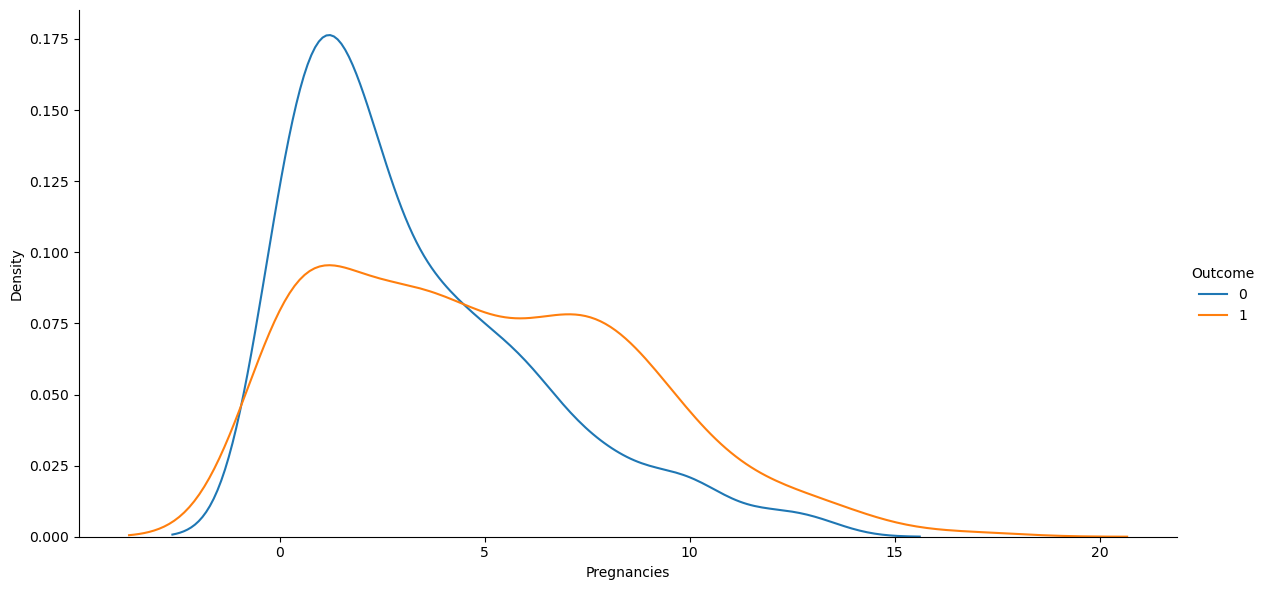

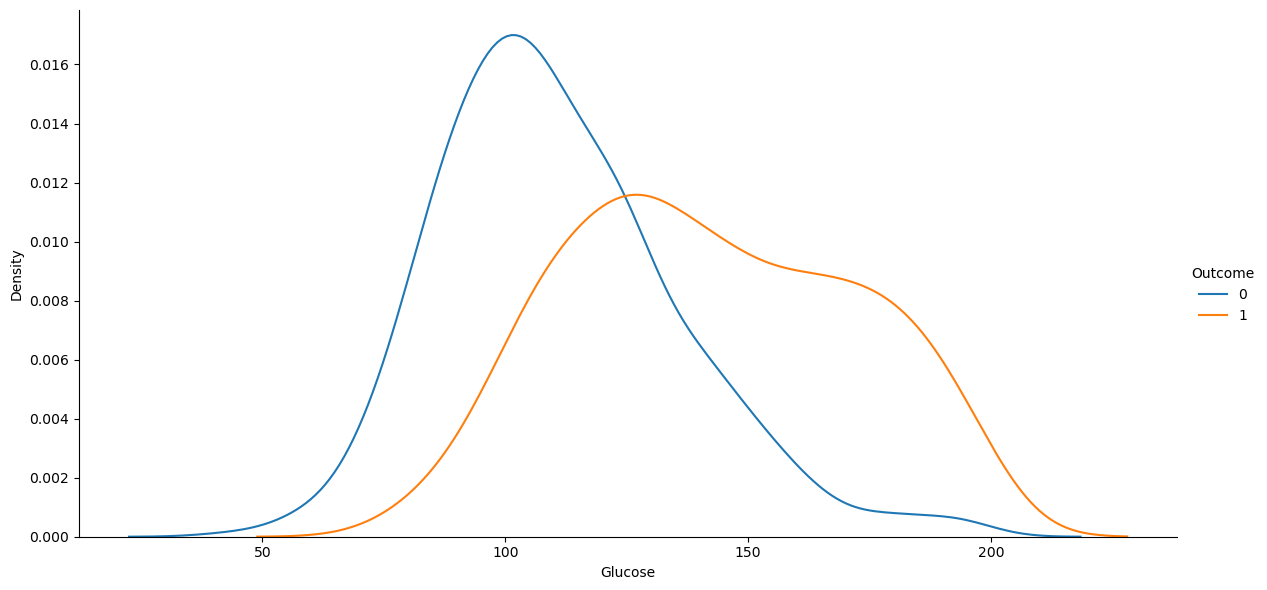

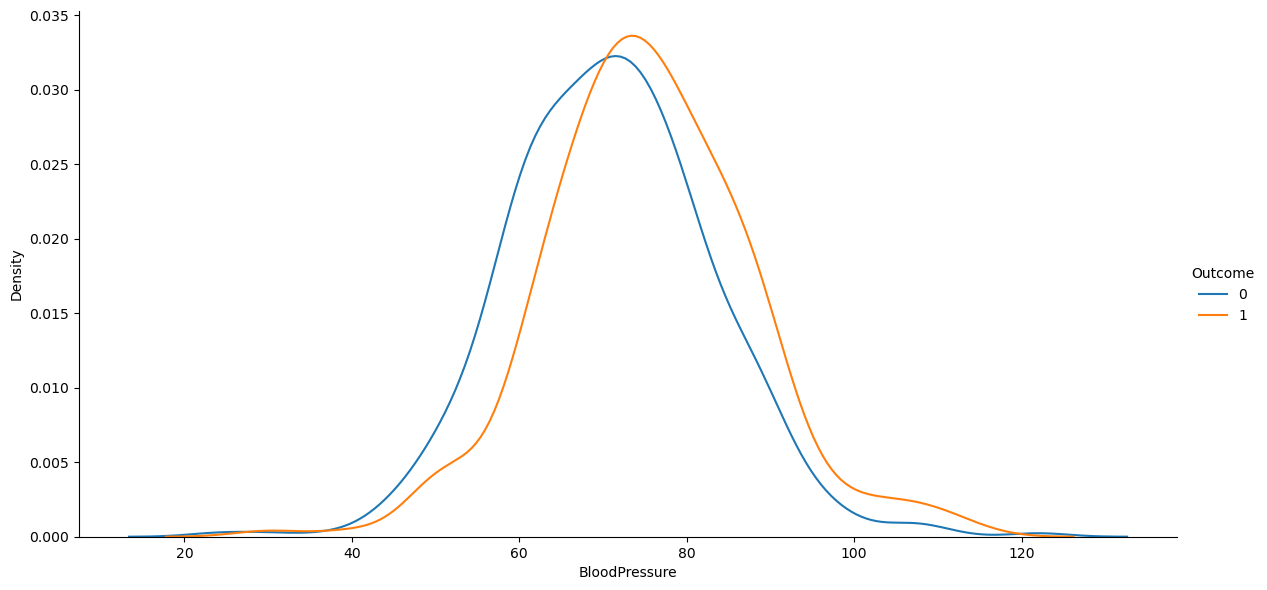

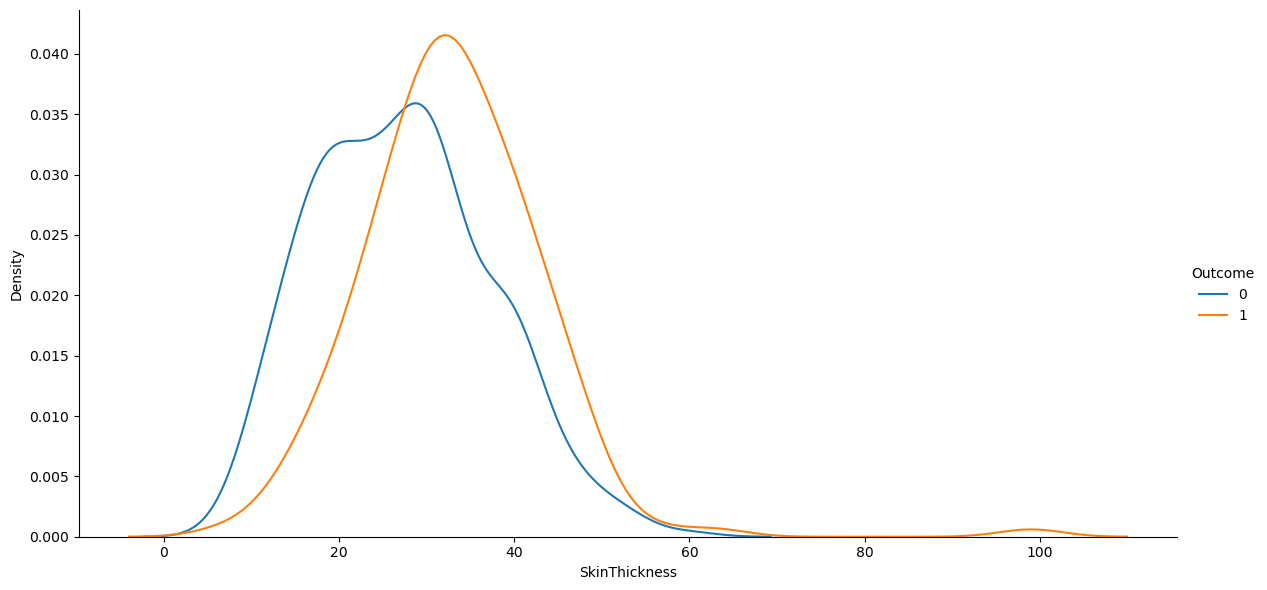

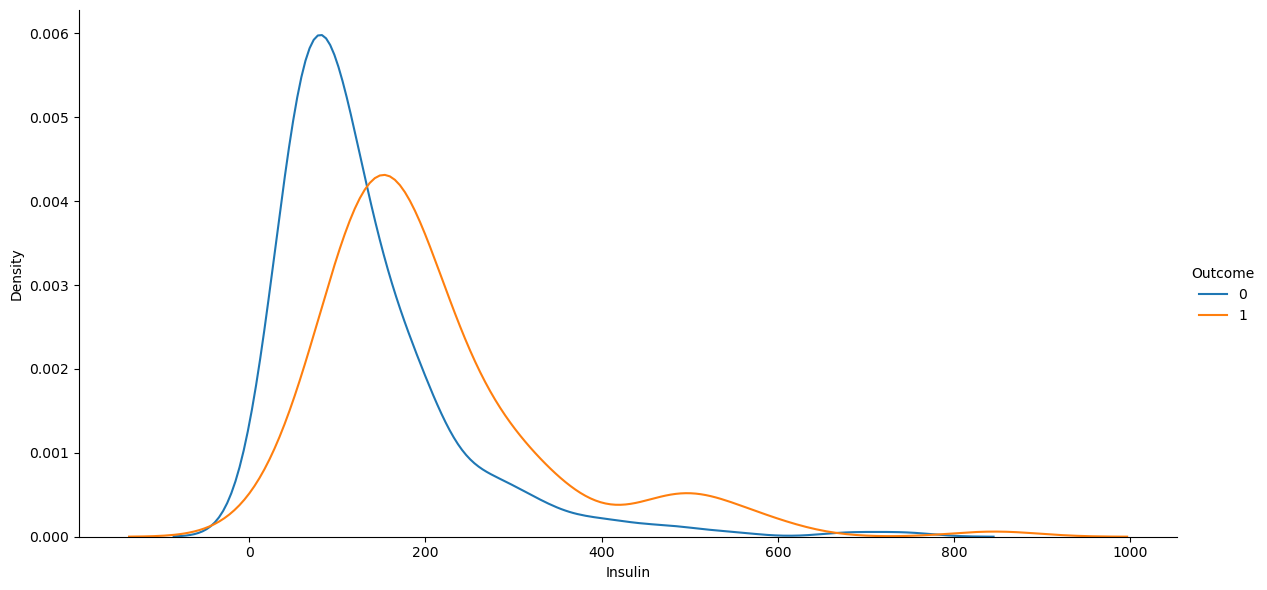

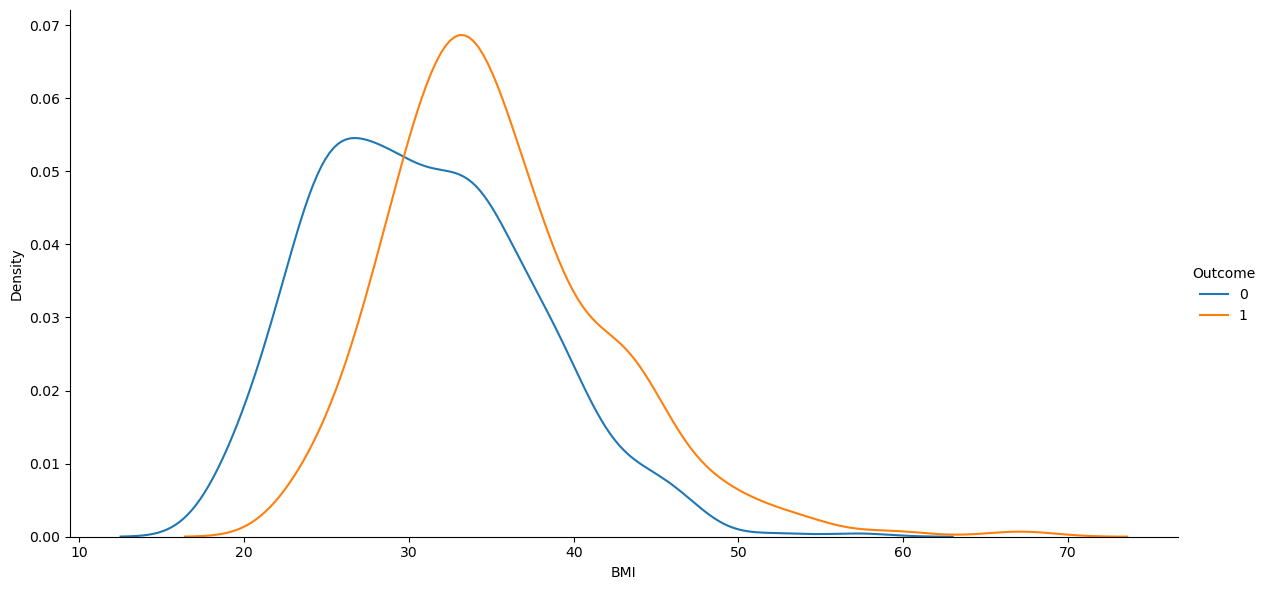

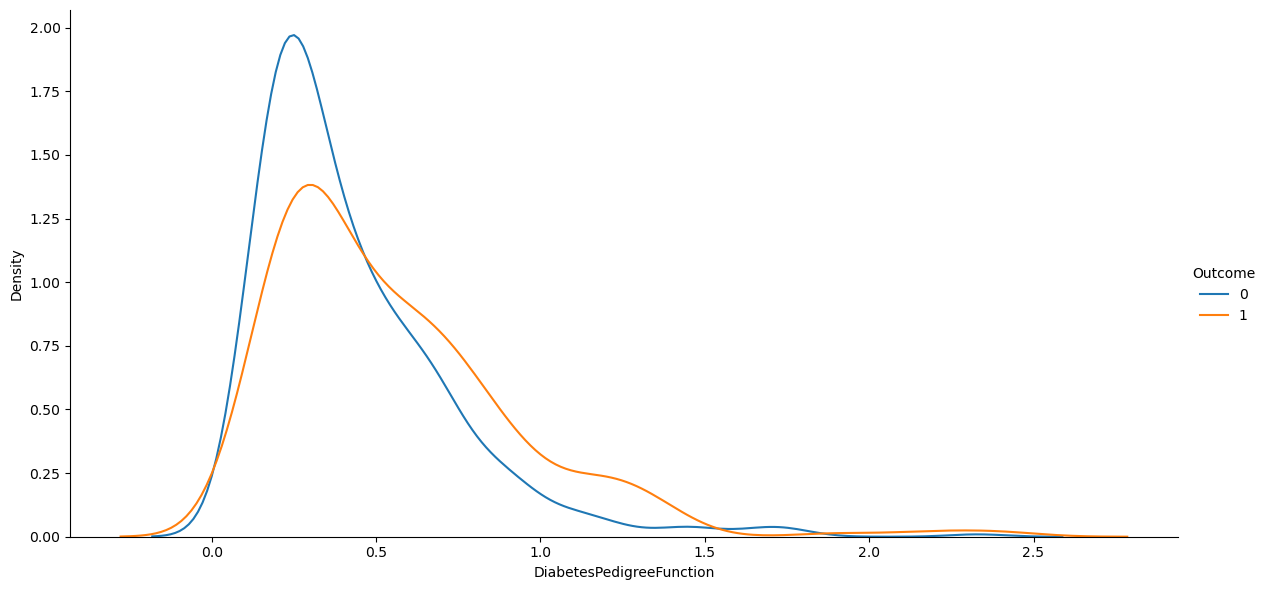

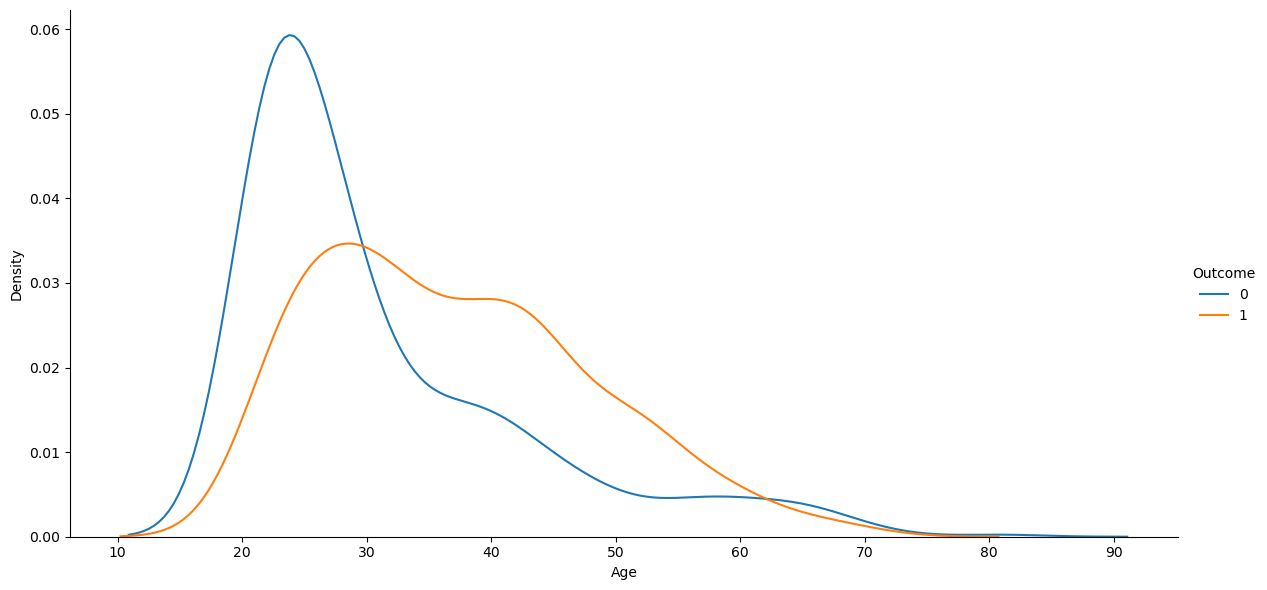

In [70]:
kde('Pregnancies')
kde('Glucose')
kde('BloodPressure')
kde('SkinThickness')
kde('Insulin')
kde('BMI')
kde('DiabetesPedigreeFunction')
kde('Age')

In [71]:
scatter('BMI','Glucose')

In [72]:
normal_data = rowdata
print(normal_data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0      NaN  33.6   
1              1     85.0           66.0           29.0      NaN  26.6   
2              8    183.0           64.0            NaN      NaN  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0      NaN  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0            NaN      NaN  30.1   
767            1     93.0           70.0           31.0      NaN  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [73]:
#利用前面將那些為0的數值變成缺失值後，現在檢查有缺失數值的數量
normal_data.isnull().sum(axis=0)

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [77]:
normal_data.dropna(
    axis=0,     # axis=0: 對行進行操作; axis=1: 對列進行操作
    how='any',   # 'any': 只要存在 NaN 就 drop 掉; 'all': 必須全部是 NaN 才 drop 
    inplace=True)#是否在原資料上操作。如果為真，返回None否則返回新的copy，去掉了缺失值

data = normal_data.reset_index(drop=True) # 刪除'列'資料後，需要reset資料的索引 index

In [78]:
#在數據整理過後，僅剩下391筆數值
print(data)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              1     89.0           66.0           23.0     94.0  28.1   
1              0    137.0           40.0           35.0    168.0  43.1   
2              3     78.0           50.0           32.0     88.0  31.0   
3              2    197.0           70.0           45.0    543.0  30.5   
4              1    189.0           60.0           23.0    846.0  30.1   
..           ...      ...            ...            ...      ...   ...   
387            0    181.0           88.0           44.0    510.0  43.3   
388            1    128.0           88.0           39.0    110.0  36.5   
389            2     88.0           58.0           26.0     16.0  28.4   
390           10    101.0           76.0           48.0    180.0  32.9   
391            5    121.0           72.0           23.0    112.0  26.2   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.167   21        0  
1                  

In [96]:
#將處理過後的新數據從新排列形成新的表單(先列出前五個看是否有錯誤的新數值)
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
1,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
2,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
3,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
4,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1


In [92]:
data_one_hot = pd.get_dummies(data)
data_one_hot.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
1,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
2,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
3,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
4,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1


In [93]:
#因為Outcome為我們的預測目標，因此要先將其捨棄掉
clear_data = data_one_hot.drop(['Outcome'],axis=1)
label = data_one_hot['Outcome']

In [94]:
clear_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,89.0,66.0,23.0,94.0,28.1,0.167,21
1,0,137.0,40.0,35.0,168.0,43.1,2.288,33
2,3,78.0,50.0,32.0,88.0,31.0,0.248,26
3,2,197.0,70.0,45.0,543.0,30.5,0.158,53
4,1,189.0,60.0,23.0,846.0,30.1,0.398,59


In [95]:
clear_data
#經過整理以及刪除預測目標後，所要的新數據

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,89.0,66.0,23.0,94.0,28.1,0.167,21
1,0,137.0,40.0,35.0,168.0,43.1,2.288,33
2,3,78.0,50.0,32.0,88.0,31.0,0.248,26
3,2,197.0,70.0,45.0,543.0,30.5,0.158,53
4,1,189.0,60.0,23.0,846.0,30.1,0.398,59
...,...,...,...,...,...,...,...,...
387,0,181.0,88.0,44.0,510.0,43.3,0.222,26
388,1,128.0,88.0,39.0,110.0,36.5,1.057,37
389,2,88.0,58.0,26.0,16.0,28.4,0.766,22
390,10,101.0,76.0,48.0,180.0,32.9,0.171,63


In [97]:
x_features = clear_data.iloc[:,:-1]
y_label = clear_data.iloc[:,-1]
x_features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,1,89.0,66.0,23.0,94.0,28.1,0.167
1,0,137.0,40.0,35.0,168.0,43.1,2.288
2,3,78.0,50.0,32.0,88.0,31.0,0.248
3,2,197.0,70.0,45.0,543.0,30.5,0.158
4,1,189.0,60.0,23.0,846.0,30.1,0.398
...,...,...,...,...,...,...,...
387,0,181.0,88.0,44.0,510.0,43.3,0.222
388,1,128.0,88.0,39.0,110.0,36.5,1.057
389,2,88.0,58.0,26.0,16.0,28.4,0.766
390,10,101.0,76.0,48.0,180.0,32.9,0.171


In [100]:
from sklearn.model_selection import KFold

In [102]:
kf = KFold(n_splits = 5, shuffle=True, random_state=42)

In [103]:
from sklearn.linear_model import LinearRegression

In [104]:
model = LinearRegression()

In [105]:
test_bias = []
test_variance = []
train_errors = []
test_errors = []

for train_index, test_index in kf.split(x_features):
    x_train, y_train =x_features.iloc[train_index], y_label[train_index]
    x_test, y_test = x_features.iloc[test_index], y_label[test_index]


    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred =model.predict(x_test)

    bias = np.sum((y_test_pred - np.mean(y_test)) ** 2) / len(y_test_pred)
    variance = np.sum((y_test_pred -np.mean(y_test_pred))**2) / len(y_test_pred)

    test_bias.append(bias)
    test_variance.append(variance)

    #計算訓練和試的誤差
    train_error = np.sum((y_train_pred - y_train) ** 2) / len(y_train_pred)
    test_error = np.sum((y_test_pred - y_test) ** 2) / len(y_test_pred)
    
    train_errors.append(train_error)
    test_errors.append(test_error)

In [106]:
print("Bias:",test_bias)
print("Variance:",test_variance)

print("平均訓練誤差:", sum(train_errors) / len(train_errors))
print("平均測試誤差: ",sum(test_errors) / len(test_errors))

Bias: [71.1152817678863, 59.29461169738918, 57.00853936317382, 36.52050235397677, 58.484587341501516]
Variance: [69.47272143328549, 57.49793757713321, 56.9915666779203, 36.438727375248725, 58.358762640161075]
平均訓練誤差: 48.30356981859768
平均測試誤差:  52.86359701847738
